# Veri Setini Okuma

In [2]:
import pandas as pd

file_path = "C:/Users/ASUS/Desktop/Credit Risk Analysis/credit_risk_dataset.csv"

data = pd.read_csv(file_path)

In [3]:
data.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# Veri Setinin Özelliklerine Bakılması ve Hazırlık

In [4]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

* person_age: Kişinin yaşı
* person_income: Kişinin geliri
* person_home_ownership: Ev sahipliği durumu (RENT, OWN, MORTGAGE gibi)
* person_emp_length: İşteki çalışma süresi (yıl cinsinden)
* loan_intent: Kredi amacı (PERSONAL, EDUCATION, MEDICAL gibi)
* loan_grade: Kredi derecesi
* loan_amnt: Kredi miktarı
* loan_int_rate: Kredi faiz oranı
* loan_status: Kredinin durumu (1: Geri ödenmemiş, 0: Geri ödenmiş)
* loan_percent_income: Kredi miktarının gelire oranı
* cb_person_default_on_file: Kişinin geçmişte kredi temerrüdü olup olmadığı (Y/N)
* cb_person_cred_hist_length: Kredi geçmişi uzunluğu (yıl)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# Eksik verileri doldurma
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

In [8]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.767994,4.087372,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.009620,3.081611,5.42,8.49,10.99,13.11,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [10]:
#Aykırı değer tespiti için IQR hesaaplama fonksiyonu

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aykırı değer içeren sütunlarda sınır belirleme ve aykırı değerleri kaldırma
columns_with_outliers = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for col in columns_with_outliers:
    data = remove_outliers(data, col)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,26149.0,26.175953,3.969872,20.00,23.00,25.00,28.00,40.00
person_income,26149.0,57436.358025,26284.164282,4080.00,37700.00,53000.00,73000.00,139008.00
person_emp_length,26149.0,4.342384,3.320069,0.00,2.00,4.00,6.00,14.00
loan_amnt,26149.0,8328.331867,4808.006862,500.00,4800.00,7500.00,11225.00,22500.00
loan_int_rate,26149.0,10.905521,3.034475,5.42,8.00,10.99,13.06,20.62
loan_status,26149.0,0.202570,0.401922,0.00,0.00,0.00,0.00,1.00
loan_percent_income,26149.0,0.160154,0.089766,0.01,0.09,0.14,0.22,0.41
cb_person_cred_hist_length,26149.0,4.825347,2.707359,2.00,3.00,4.00,7.00,13.00


In [12]:
data.shape

(26149, 12)

In [13]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Veri Setinin Görselleştirilmesi

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Yaş Dağılımı')

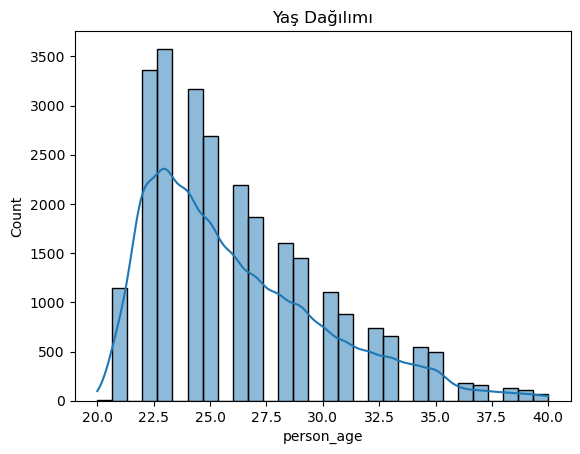

In [17]:
# Yaş Dağılımı

sns.histplot(data["person_age"], bins = 30, kde = True)
plt.title("Yaş Dağılımı")

Text(0.5, 1.0, 'Gelir Dağılımı')

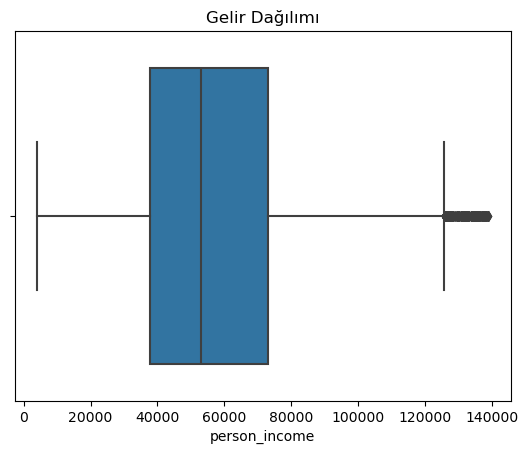

In [18]:
# Gelir Dağılımı

sns.boxplot(x = data["person_income"])
plt.title("Gelir Dağılımı")

Text(0.5, 1.0, 'Ev Sahipliği Durumu')

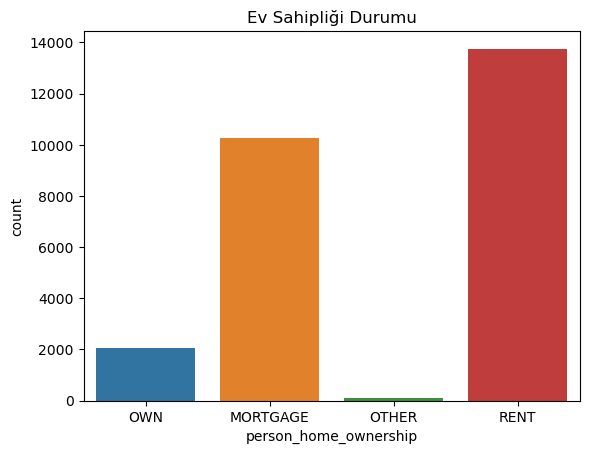

In [19]:
# Ev Sahipliği Durumları (Bar Plot)

sns.countplot(x=data["person_home_ownership"])
plt.title("Ev Sahipliği Durumu")

Text(0.5, 1.0, 'Kredi Amacına Göre Dağılım')

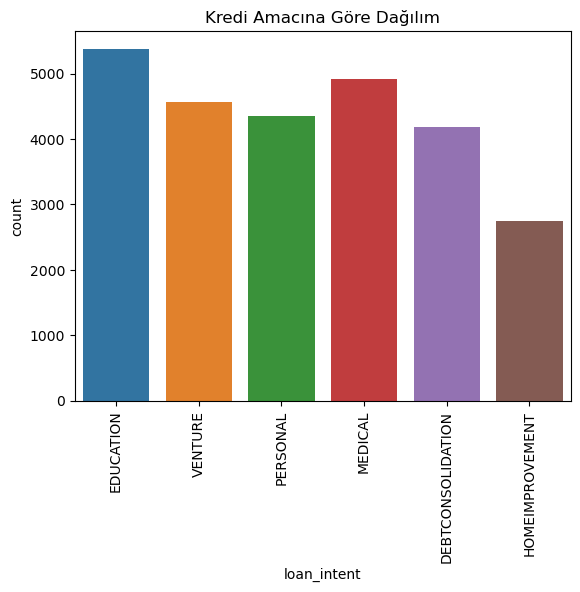

In [21]:
# Kredi Amacına Göre Dağılım (Bar Plot)

sns.countplot(x = data["loan_intent"])
plt.xticks(rotation = 90)
plt.title("Kredi Amacına Göre Dağılım")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Kredi Faiz Oranları')

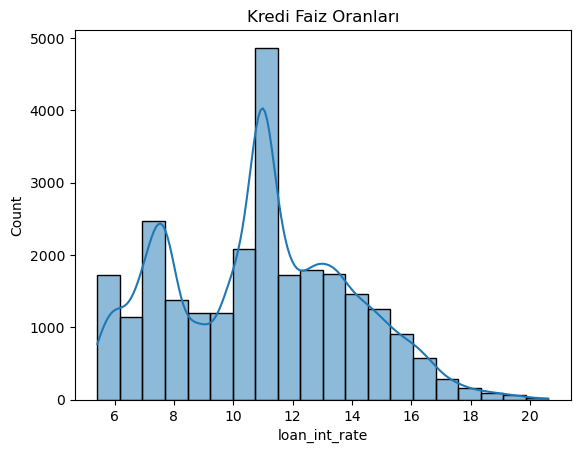

In [22]:
# Kredi Faiz Oranları (Histogram)

sns.histplot(data["loan_int_rate"], bins = 20, kde = True)
plt.title("Kredi Faiz Oranları")

Text(0.5, 1.0, 'Kredi Miktarı Dağılımı')

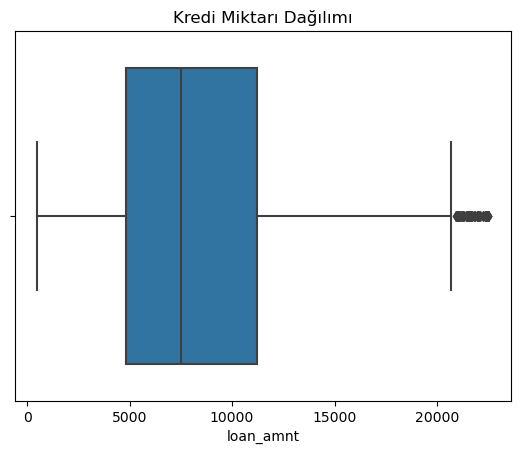

In [23]:
# Kredi Miktarı Dağılımı (Boxplot)

sns.boxplot(x = data["loan_amnt"])
plt.title("Kredi Miktarı Dağılımı")

Text(0.5, 1.0, 'Kredi Durumuna Göre Dağılım')

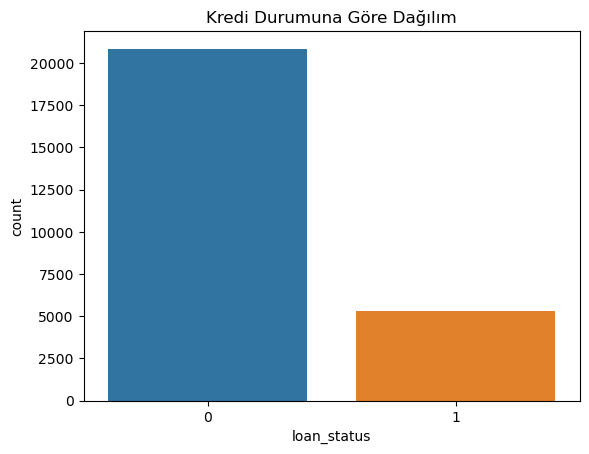

In [24]:
# Kredi Durumuna Göre Dağılım (Bar Plot)

sns.countplot(x=data["loan_status"])
plt.title("Kredi Durumuna Göre Dağılım")

--------------------------

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


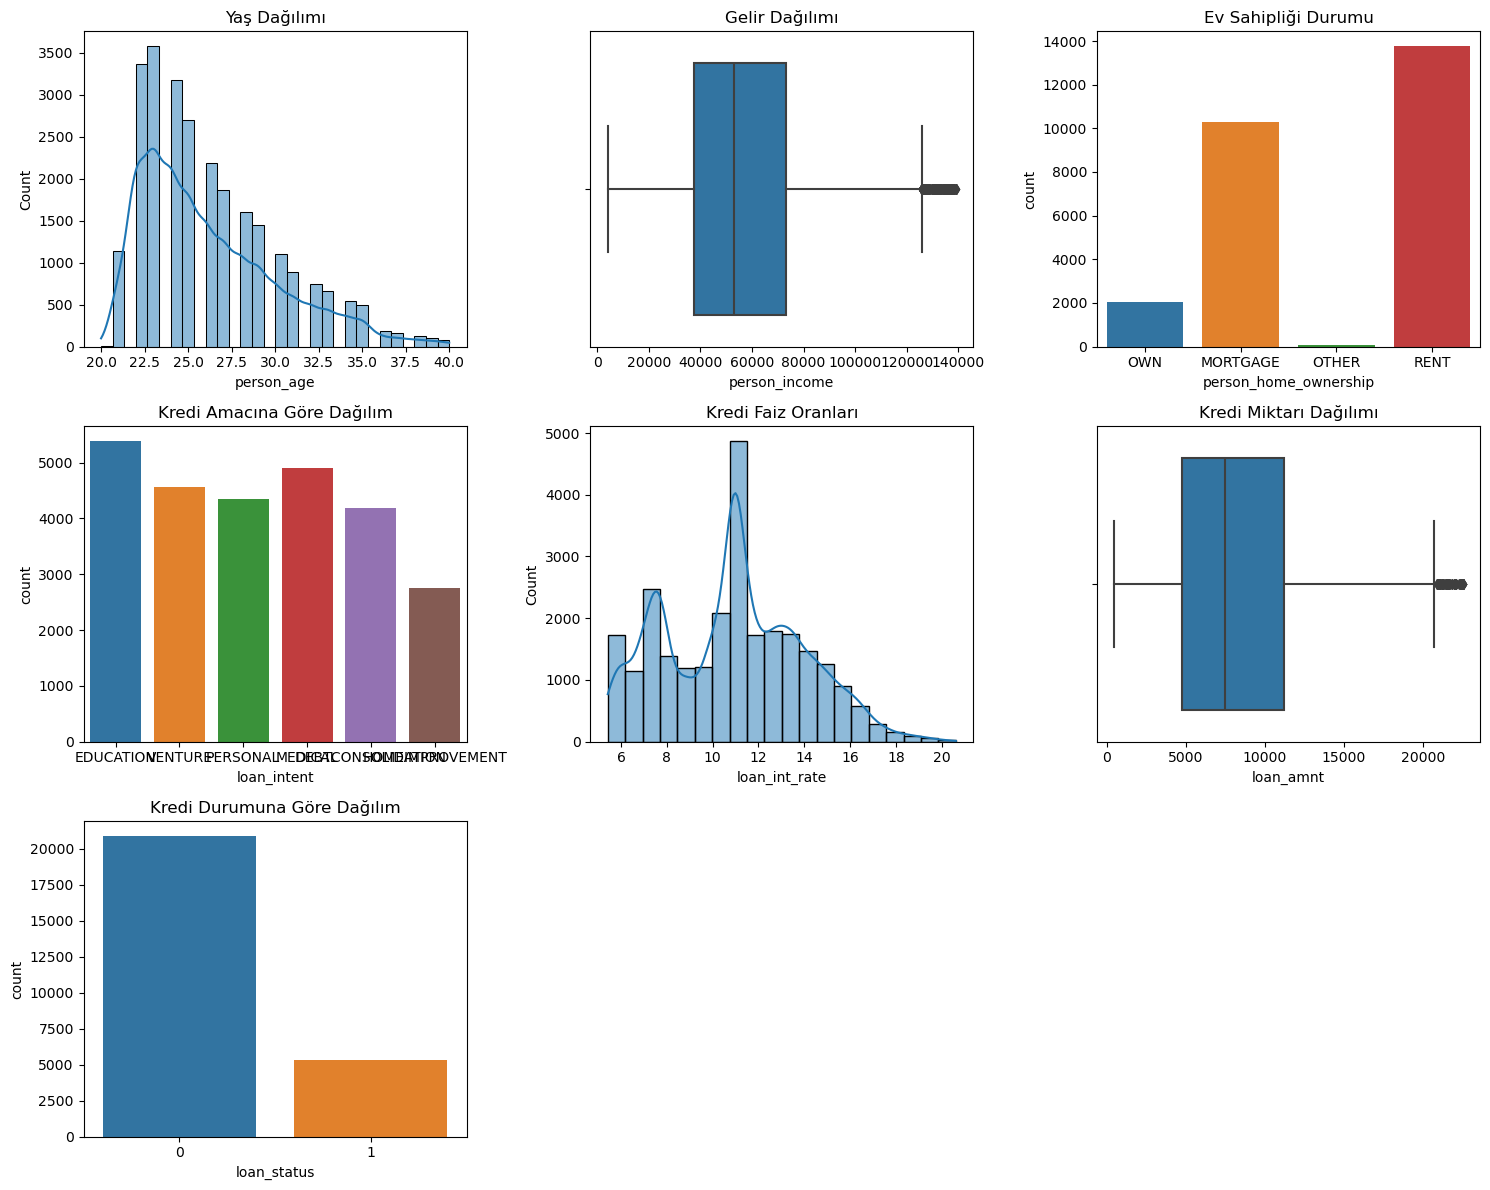

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Görselleştirmeler
plt.figure(figsize=(15, 12))

# 1. Yaş Dağılımı
plt.subplot(3, 3, 1)
sns.histplot(data['person_age'], bins=30, kde=True)
plt.title('Yaş Dağılımı')

# 2. Gelir Dağılımı (Boxplot)
plt.subplot(3, 3, 2)
sns.boxplot(x=data['person_income'])
plt.title('Gelir Dağılımı')

# 3. Ev Sahipliği Durumları (Bar Plot)
plt.subplot(3, 3, 3)
sns.countplot(x=data['person_home_ownership'])
plt.title('Ev Sahipliği Durumu')

# 4. Kredi Amacına Göre Dağılım (Bar Plot)
plt.subplot(3, 3, 4)
sns.countplot(x=data['loan_intent'])
plt.title('Kredi Amacına Göre Dağılım')

# 5. Kredi Faiz Oranları (Histogram)
plt.subplot(3, 3, 5)
sns.histplot(data['loan_int_rate'], bins=20, kde=True)
plt.title('Kredi Faiz Oranları')

# 6. Kredi Miktarı Dağılımı (Boxplot)
plt.subplot(3, 3, 6)
sns.boxplot(x=data['loan_amnt'])
plt.title('Kredi Miktarı Dağılımı')

# 7. Kredi Durumuna Göre Dağılım (Bar Plot)
plt.subplot(3, 3, 7)
sns.countplot(x=data['loan_status'])
plt.title('Kredi Durumuna Göre Dağılım')

plt.tight_layout()
plt.show()


--------------------------------

# Veri Setinin Modele Hazırlanması

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
data_encoded = pd.get_dummies(data, columns=['person_home_ownership',
                                             'loan_intent', 'loan_grade',
                                             'cb_person_default_on_file'], drop_first=True)

# Hedef ve özellikler
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modelin Oluşturulması ve Eğitilmesi

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Lojistik Regresyon modeli
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Random Forest modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Performansının Değerlendirilmesi

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Lojistik Regresyon değerlendirme
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Lojistik Regresyon Performansı")
print(classification_report(y_test, y_pred_log_reg))
print(f"Doğruluk Skoru: {accuracy_score(y_test, y_pred_log_reg)}\n")

# Random Forest değerlendirme
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performansı")
print(classification_report(y_test, y_pred_rf))
print(f"Doğruluk Skoru: {accuracy_score(y_test, y_pred_rf)}")

Lojistik Regresyon Performansı
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4199
           1       0.72      0.50      0.59      1031

    accuracy                           0.86      5230
   macro avg       0.80      0.73      0.76      5230
weighted avg       0.85      0.86      0.85      5230

Doğruluk Skoru: 0.8632887189292543

Random Forest Performansı
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4199
           1       0.95      0.67      0.79      1031

    accuracy                           0.93      5230
   macro avg       0.94      0.83      0.87      5230
weighted avg       0.93      0.93      0.92      5230

Doğruluk Skoru: 0.9277246653919694
